Завдання: Створити власний набір даних для навчання та тренування моделі бінарної класифікації.

Завантаження та обробка зображень

In [16]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Створення функції для обробки зображень
def preprocess_images(data_dir, categories, target_size=(64, 64)):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, target_size)
                img = img / 255.0  #Нормалізація
                data.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return np.array(data), np.array(labels)

base_dir = "/Users/alexeipavlenko/Downloads/archive/Master Folder/train"
categories = ["Angry", "happy", "Other", "Sad"]

data, labels = preprocess_images(base_dir, categories)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#Кодування міток
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print("Дані підготовлено:", X_train.shape, X_test.shape)

Дані підготовлено: (800, 64, 64, 3) (200, 64, 64, 3)


2. Реалізація моделі CNN

2.1 Імпорт бібліотек
2.2 Створення архітектури CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
#Створення моделі
model = Sequential([
    #Згорткові шари
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Розгортання та повнозв'язані шари
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  #Кількість класів = кількість категорій
])

#Компіляція моделі
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

3. Тренування та тестування моделі

3.1 Тренування

In [12]:
#Раннє зупинення
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2592 - loss: 1.4968 - val_accuracy: 0.2313 - val_loss: 1.3869
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2730 - loss: 1.3810 - val_accuracy: 0.2438 - val_loss: 1.3836
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3434 - loss: 1.3557 - val_accuracy: 0.3000 - val_loss: 1.3635
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4233 - loss: 1.2656 - val_accuracy: 0.3000 - val_loss: 1.3435
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4507 - loss: 1.2168 - val_accuracy: 0.3125 - val_loss: 1.3333
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5941 - loss: 1.0276 - val_accuracy: 0.3562 - val_loss: 1.3283
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6700 - loss: 0.8958 - val_accuracy: 0.4125 - val_loss: 1.3452
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7622 - loss: 0.6655 - val_accuracy: 0.4625 - v

3.2 Оцінка на тестових даних

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точність на тестових даних: {test_accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3982 - loss: 1.2688 
Точність на тестових даних: 0.43


4. Візуалізація результатів

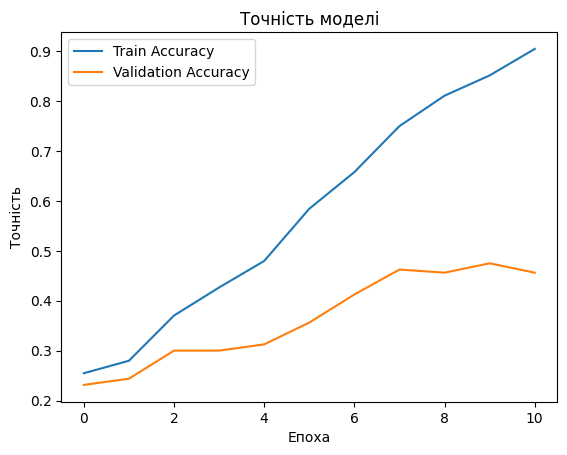

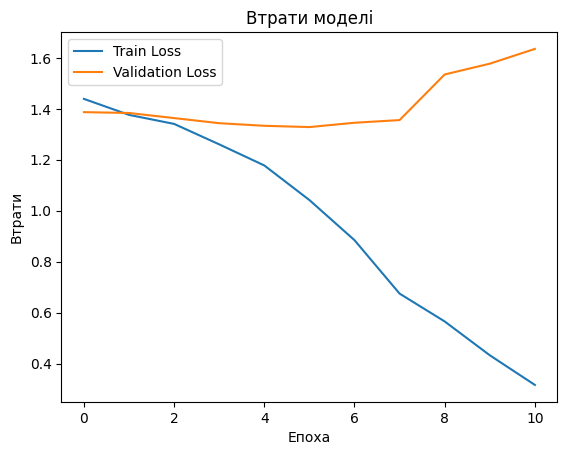

In [14]:
import matplotlib.pyplot as plt

#Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

#Графік втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.show()

5. Оцінка ефективності моделі

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#Класифікаційний звіт
print("Класифікаційний звіт:")
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

#Матриця плутанини
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Матриця плутанини:")
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Класифікаційний звіт:
              precision    recall  f1-score   support

       Angry       0.53      0.39      0.45        44
       happy       0.36      0.62      0.45        52
       Other       0.57      0.31      0.40        55
         Sad       0.40      0.39      0.39        49

    accuracy                           0.42       200
   macro avg       0.46      0.42      0.42       200
weighted avg       0.46      0.42      0.42       200

Матриця плутанини:
[[17 15  4  8]
 [ 4 32  5 11]
 [ 8 20 17 10]
 [ 3 23  4 19]]
